# Heat Transfer Equation

In [4]:
# source https://firsttimeprogrammer.blogspot.com/2015/07/the-heat-equation-python-implementation.html

We are going to simulate the **transport of heat through an ideal rod**.


Suppose you have a cylindrical rod whose ends are maintained at a fixed temperature and is heated at a certain x for a certain interval of time. Suppose that the temperature in each section with infinitesimal width dx is uniform so that we can describe the temperature in the rod using a function of only x and t. 

![](https://lh3.googleusercontent.com/-cff27bP9xgs/Vabctr3rg2I/AAAAAAAABI8/ywmYLJYaLlA/im_thumb%25255B1%25255D.jpg?imgmax=800)

Mathematically speaking, problem we are now facing is the following:

$$
\begin{align}
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2a} &   & 0 < t; 0 \leq x \leq L  \\
u(x,0)  = f(x) & &  0 < x < L \\
u(0,t) =  u(L,t) = 0 & & t > 0
\end{align}
$$




where $k$ is a constant called *thermal diffusivity* or *thermal conductivity* and is different according to the different materials. By using the method of separation of variables, we can find the solution we need and by applying the initial conditions we find a particular solution for $f(x) = sin(x)$ and $L = pi$ 
Our solution looks something like this:

$$ u(x,t) = e^{-kt}\, \sin(x) $$

Now we only need to evaluate our function at each x and t. Remember that if u(x,y) is differentiable, then:

$$ f(x_0 + h, t_0 + l) = f(x_0,t_0) + \frac{\partial u}{\partial x}(x_0,t_0)\,h + \frac{\partial u}{\partial t}(x_0,t_0)\,l +\mathcal{O}(\sqrt{h^2+l^2}) $$

holds. We can throw out the last term and approximate our function using the above relation since partial derivatives of u must exists and we can easily get them. Thinking about it, the second term is useless too, since we are not moving along the x axis, therefore we are left with the following:

$$ f(x_0 + h, t_0 + l) \approx f(x_0,t_0) + \frac{\partial u}{\partial t}(x_0,t_0)\,l $$



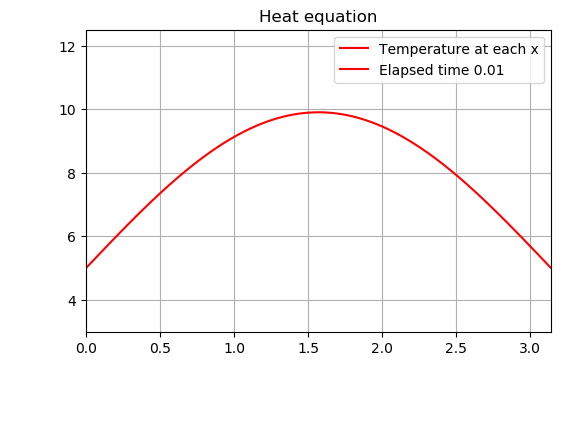

In [5]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

#Diffusion constant
k = 2

#Scaling factor (for visualisation purposes)
scale = 5

#Length of the rod (0,L) on the x axis
L = pi

#Initial contitions u(0,t) = u(L,t) = 0. Temperature at x=0 and x=L is fixed
x0 = np.linspace(0,L+1,10000)
t0 = 0
temp0 = 5  #Temperature of the rod at rest (before heating)

#Increment
dt = 0.01

#Heat function
def u(x,t):
    return temp0 + scale*np.exp(-k*t)*np.sin(x)

#Gradient of u
def grad_u(x,t):
                               #du/dx              #du/dt
    return scale*np.array([np.exp(-k*t)*np.cos(x),-k*np.exp(-k*t)*np.sin(x)])

a = []
t = []

for i in range(500):
    value = u(x0,t0) + grad_u(x0,t0)[1]*dt
    t.append(t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(i):         #The plot shows the temperature evolving with time
    global k            #at each point x in the rod
    x = a[k]            #The ends of the rod are kept at temperature temp0
    k += 1              #The rod is heated in one spot, then it cools down
    ax1.clear()
    plt.plot(x0,x,color='red',label='Temperature at each x')
    plt.plot(0,0,color='red',label='Elapsed time '+str(round(t[k],2)))
    plt.grid(True)
    plt.ylim([temp0-2,2.5*scale])
    plt.xlim([0,L])
    plt.title('Heat equation')
    plt.legend()
    
anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()